<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker, Vincent Post, and Anna Lisa Labaar*
## Notebook 10: Loading and plotting data

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

### Excel files with multiple sheets
Many Excel files have multiple sheets. The `read_excel` function has a keyword argument `sheet_name`. The default of `sheet_name` is 0, which returns the first sheet as a `DataFrame`. Alternatively, the name or names of the sheets that you want to read can be specified. When `sheet_name` is set to `None`, all sheets are read and returned as a dictionary, where the `keys` are the names of the sheets. Each entry in the dictionary is a `DataFrame`.

### Exercise 3. Excel file with multiple sheets
The Excel file `ameland_exercise.xlsx` contains multiple sheets with groundwater data on the island of Ameland. The first sheet contains the coordinates of the observation wells (Dutch: peilbuizen) where the head (Dutch: stijghoogte) is measured. The other sheets contain the heads measured at the eight observation wells specified on the first sheet. The names of the sheets are the identification codes of the observation wells. Read the data from the Excel file using the dates for the index. Create a grid of eight graphs consisting of 2 rows and 4 columns  to plot the heads measured in the eight wells (one graph for each well). Use a figure size of (16, 8). Add the well code as a title to each graph. Use `plt.subplots_adjust` to adjust the space between graphs so that the values on the horizontal and vertical axes can easily be read. 

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


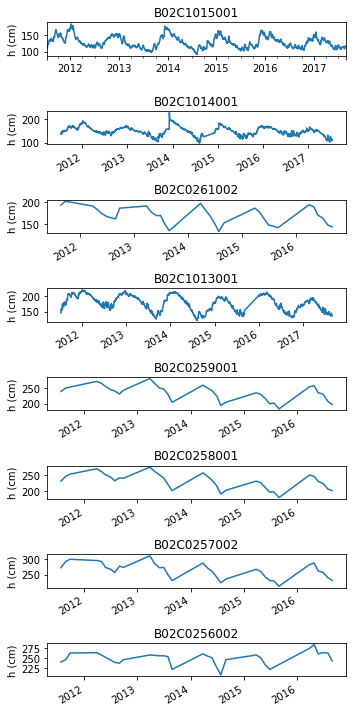

In [61]:
xldata = pd.read_excel('ameland_exercise.xlsx', sheet_name=None, index_col=0, parse_dates=True)
nc = len(xldata) - 1
fig, axs = plt.subplots(nrows=nc, figsize=(5,10))
print(axs)
keylist = list(data.keys())
for i, sheet in enumerate(xldata):
    if (i == 0):
        continue
    ax = axs[i - 1]
    xldata[sheet].plot(ax=ax, legend=False)
    ax.set_title(sheet)
    ax.set_xlabel('')
    ax.set_ylabel('h (cm)')
plt.tight_layout()

### Exercise 4
Use the data of the wells on the island of Ameland from the previous exercise. Write a loop to create separate graphs for each of the eight wells. Add your name as the title to every graph. Save each graph in its own file using `plt.savefig`. The name of the file must be `well_id.png`, where `well_id` is the identification code of the well (and is the same as the name of the sheet). 

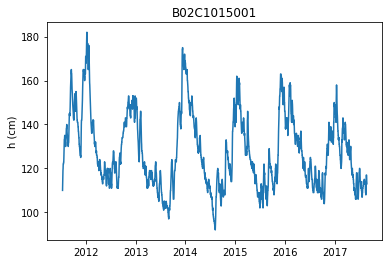

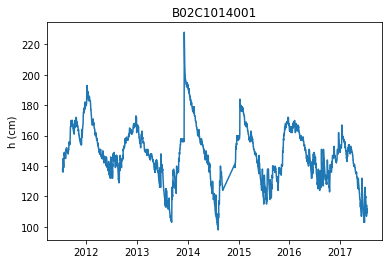

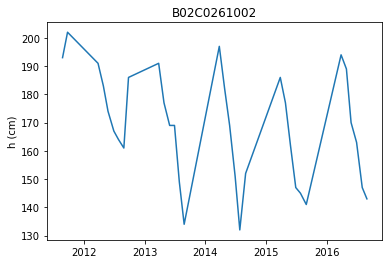

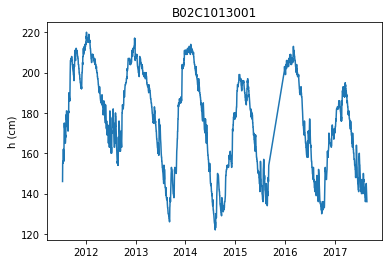

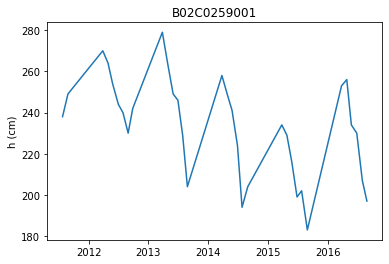

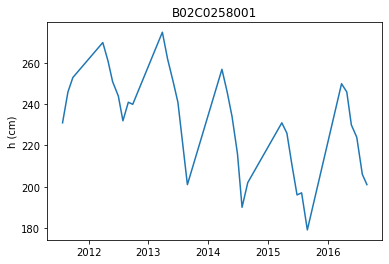

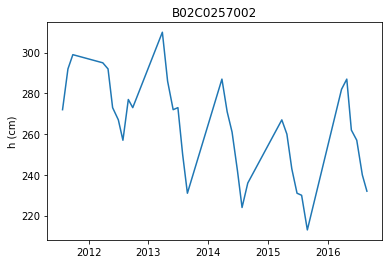

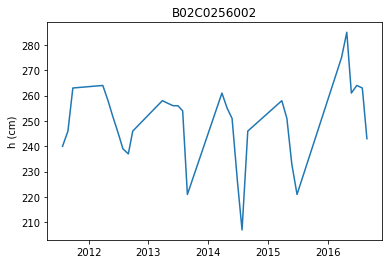

In [64]:
def plot_df(df):
    fig, ax = plt.subplots()
    ax.plot(df.index, df["head (cm amsl)"])
    ax.set_ylabel('h (cm)')
    ax.set_title(sheet)
    fname = f"{sheet}.png"
    plt.savefig(fname)
    
    return fname
    
for i, sheet in enumerate(xldata):
    if (i == 0):
        continue
    plot_df(xldata[sheet])


### Create a KML file
A KML file (Keyhole Markup Language) can be used to display geographic data on Google Earth or Google Maps. Here, we will use the package `simplekml` to create a KML file. First, we need to install `simplekml`, as it is not part of Anaconda. Open the Anaconda Prompt and type

`pip install simplekml`

After successful installation, the Anaconda prompt can be closed. 

Creation of a simple KML file with points that link to graphs consists of the following steps:
1. Create a `Kml` object with `simplekml.Kml()`
2. Add a graph file to the `Kml` object using the `.addfile` function and store the path
3. Add a new point to the `Kml` object using the `.newpoint` function and store the point
4. Add a description to the point so that the graph will display in the viewer when clicking on the point

### Exercise 5
Install `simplekml` and run the script below. The script below generates a file called `ameland.kmz` (a zipped kml file) provided you created the 8 png files in the previous exercise and gave them the correct names. Next, open the website [http://kmlviewer.nsspot.net](http://kmlviewer.nsspot.net). Drag the `ameland.kmz` file you just created onto the map area of the website. The site will zoom in on the island of Ameland with makers for the 8 wells you added. Click on the different markers to see graphs of the groundwater head at those locations. Take a screen shot of your favorite graph (which has your name in the title) and edit the `Image` command in the second code cell below so that your graph is shown. Don't forget to include the file of the screen shot when you submit this notebook.

Index(['well_id', 'x', 'y', 'long', 'lat'], dtype='object')


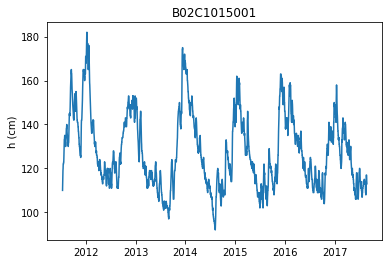

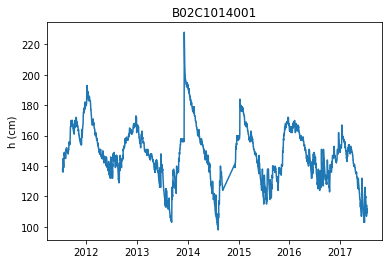

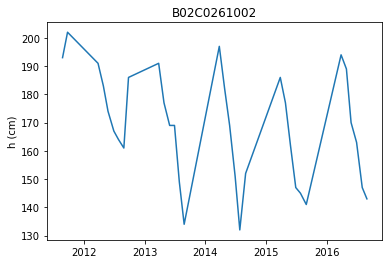

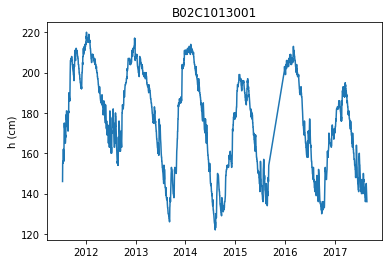

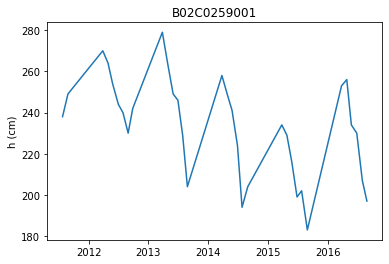

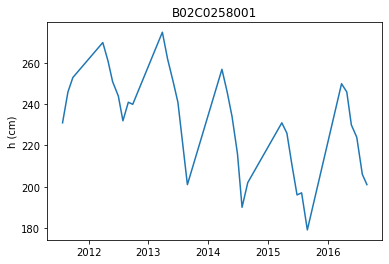

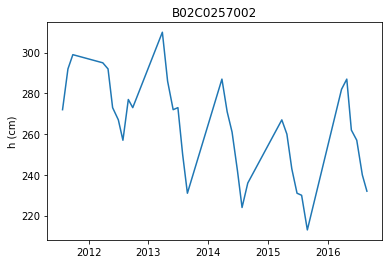

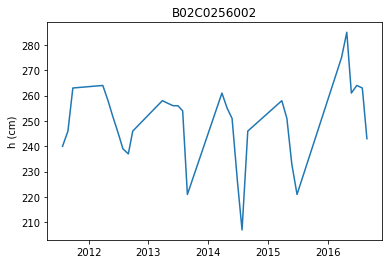

In [67]:
import simplekml

kmlfile = simplekml.Kml()

xldata = pd.read_excel('ameland_exercise.xlsx', sheet_name=None, index_col=0, parse_dates=True)
xydata = pd.read_excel('ameland_exercise.xlsx', sheet_name="coordinates")
print(xydata.columns)

for i, sheet in enumerate(xldata):
    if (i == 0):
        continue
    
    well_id = sheet[:-3]
    idx = xydata['well_id'] == well_id
    x = xydata['long'].loc[idx].values[0]
    y = xydata['lat'].loc[idx].values[0]

    fname = plot_df(xldata[sheet])

    path = kmlfile.addfile(fname)
    point = kmlfile.newpoint(name=well_id, coords=[[str(x), str(y)]])
    point.description = '<img src="' + path +'" alt={well_id} width="400" height="300" align="left" />'
    
kmlfile.savekmz('ameland.kmz', format=False)  # create kmz file